In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.special

In [2]:
from gradient.mlp_gradient import *

In [3]:
# Load the dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Normalize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target labels to one-hot encoding
num_classes = len(np.unique(y))
y_train_onehot = np.eye(num_classes)[y_train]

In [5]:
# Define the MLP shape and hyperparameters
mlp_shape = [X_train.shape[1], 64, num_classes]
learning_rate = 0.01
max_epochs = 1000
print_epochs = False

In [6]:
# Instantiate and train the MLP
mlp = MultiLayerPerceptron(shape=mlp_shape, learning_rate=learning_rate, max_epochs=max_epochs, print_epochs=print_epochs)
result = mlp.train(X_train, y_train_onehot)

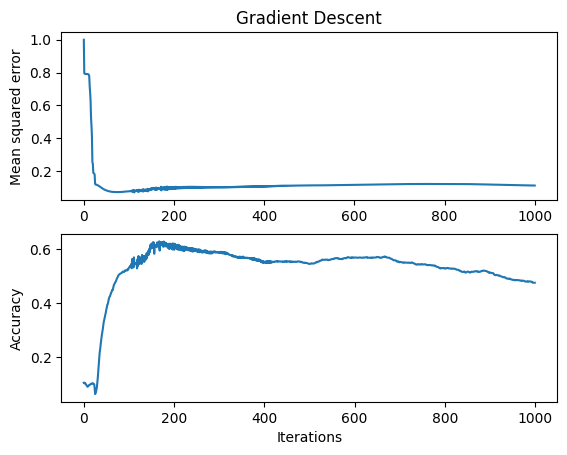

In [7]:
best_scores = result[1]
accuracies = result[2]
# Plot
error = [tup[0] for tup in best_scores]
iters = [tup[1] for tup in best_scores]
figure = plt.figure()
errorplot = plt.subplot(2, 1, 1)
errorplot.plot(error, iters)
plt.title("Gradient Descent")
plt.ylabel("Mean squared error")

accuracyplot = plt.subplot(2, 1, 2)
accuracyplot.plot(accuracies)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")

plt.show()

In [8]:
y_pred = mlp.predict(X_test)

In [9]:
# Test...
print(sklearn.metrics.classification_report(y_test, y_pred.T))
# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.77      0.86      0.81        28
           2       0.65      0.85      0.74        33
           3       0.72      0.82      0.77        34
           4       0.78      0.91      0.84        46
           5       0.83      0.81      0.82        47
           6       0.92      0.97      0.94        35
           7       0.90      0.79      0.84        34
           8       0.65      0.67      0.66        30
           9       0.55      0.68      0.61        40

    accuracy                           0.74       360
   macro avg       0.68      0.74      0.70       360
weighted avg       0.68      0.74      0.71       360

Accuracy: 0.7444444444444445


C:\Users\mbber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mbber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mbber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,